In [1]:
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt

In [2]:
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

In [4]:
cwd = os.getcwd()

In [5]:
app = FaceAnalysis(name='buffalo_l', root='./insightface/models')
app.prepare(ctx_id=0, det_size=(640, 640))

D:\anaconda3\envs\faceswap\lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ./insightface/models\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ./insightface/models\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ./insightface/models\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ./insightface/models\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ./insightface/models\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


<function matplotlib.pyplot.show(close=None, block=None)>

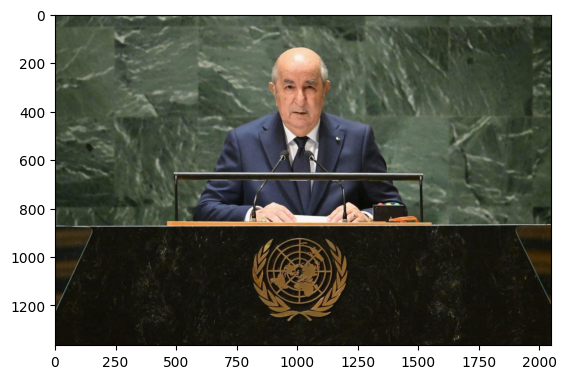

In [8]:
img = ins_get_image(cwd+os.path.sep+'tebboune')
plt.imshow(img[:,:,::-1])
plt.show

In [9]:
faces = app.get(img)

D:\anaconda3\envs\faceswap\lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


In [10]:
faces

[{'bbox': array([ 913.59515,  186.23256, 1109.6259 ,  463.89493], dtype=float32),
  'kps': array([[ 969.34924,  299.70047],
         [1054.843  ,  302.37677],
         [1012.1317 ,  365.98923],
         [ 980.0788 ,  404.0743 ],
         [1042.8751 ,  406.07758]], dtype=float32),
  'det_score': 0.8893171,
  'landmark_3d_68': array([[ 9.08471436e+02,  2.98359589e+02,  1.36274399e+02],
         [ 9.12211426e+02,  3.27499023e+02,  1.34747559e+02],
         [ 9.16615967e+02,  3.57310425e+02,  1.30525040e+02],
         [ 9.21165161e+02,  3.85991699e+02,  1.22142395e+02],
         [ 9.28975769e+02,  4.13182465e+02,  1.02106178e+02],
         [ 9.42024902e+02,  4.33352814e+02,  8.35967026e+01],
         [ 9.59151794e+02,  4.47251709e+02,  6.79432678e+01],
         [ 9.79429138e+02,  4.57220123e+02,  4.81884651e+01],
         [ 1.00855725e+03,  4.64678528e+02,  3.93927612e+01],
         [ 1.03814307e+03,  4.57884247e+02,  4.74930229e+01],
         [ 1.06287512e+03,  4.46688049e+02,  6.87140961

In [11]:
faces[0].keys()

dict_keys(['bbox', 'kps', 'det_score', 'landmark_3d_68', 'pose', 'landmark_2d_106', 'gender', 'age', 'embedding'])

In [12]:
boutef = cv2.imread(cwd+os.path.sep+'boutef.jpg')
boutef_faces = app.get(boutef)

In [13]:
swapper = insightface.model_zoo.get_model('inswapper_128.onnx', download=False)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


In [15]:
res = swapper.get(img, faces[0], boutef_faces[0])

<function matplotlib.pyplot.show(close=None, block=None)>

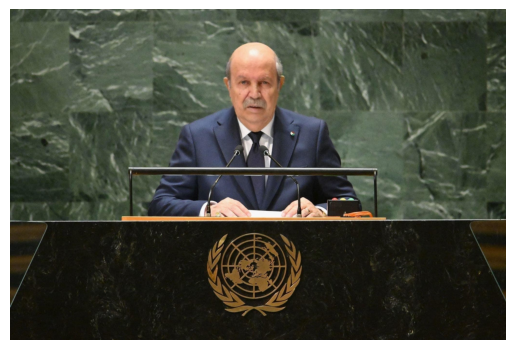

In [16]:
fig, ax = plt.subplots()
ax.imshow(res[:,:,::-1])
ax.axis('off')
plt.show